In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

%matplotlib inline

In [3]:
x_data=np.linspace(0, 2, 100)
y_data=1.5 * x_data + np.random.randn(*x_data.shape) * 0.2 + 0.5
# data_set = pd.DataFrame({"population":x_data,"profit":y_data})
data_set = pd.read_csv("dataset.csv")
X = data_set.iloc[2:, 0].values
y = data_set.iloc[2:, 1].values
population = data_set.iloc[:2, 0]
profit = data_set.iloc[:2, 1]

In [4]:
population

0    6.1101
1    5.5277
Name: Population, dtype: float64

Text(0,0.5,'Profit')

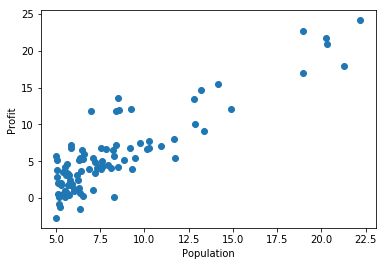

In [5]:
plt.scatter(X,y)
plt.xlabel("Population")
plt.ylabel("Profit")

In [6]:
Xtrain=X[5:]
ones=np.ones((Xtrain.shape[0],1))
Xtrain=Xtrain.reshape(-1,1)
# Xtrain=np.concatenate((ones,Xtrain),1)

In [7]:
Xtest=X[:5]
Xtest=Xtest.reshape(-1,1)
ones = np.ones((Xtest.shape[0], 1))
# Xtest = np.concatenate((ones, Xtest), 1)

In [8]:
ytrain=y[5:]
ytrain=ytrain.reshape(-1,1)
ytest=y[:5]
ytest=ytest.reshape(-1,1)

In [9]:
ytrain.shape

(90, 1)

In [10]:
ytest

array([[13.662 ],
       [11.854 ],
       [ 6.8233],
       [11.886 ],
       [ 4.3483]])

In [11]:
tfX=tf.placeholder(dtype=tf.float32,shape=(None,1),name="tfX")
tfy=tf.placeholder(dtype=tf.float32,shape=(None,1),name="tfy")

In [12]:
weight=tf.Variable(np.random.normal())
bias=tf.Variable(np.random.normal())
trained_weights=None
trained_bias=None

In [13]:
h=tf.add(tf.multiply(weight,tfX),bias)
cost=tf.reduce_mean(tf.square(h-y))

In [14]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op=optimizer.minimize(cost)

In [15]:
init=tf.global_variables_initializer()
losses=[]
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        sess.run(train_op,feed_dict={tfX:Xtrain,tfy:ytrain})
        if(i%10==0):
            prediction=sess.run(h,feed_dict={tfX:Xtest})
            loss=np.sum(np.square(prediction-ytest))
            print(f"iteration  =  {i}    loss  =  {loss}")
            losses.append(loss)
            
    trained_weights=weight.eval()
    trained_bias=bias.eval()
    

iteration  =  0    loss  =  1387.1933159991988
iteration  =  10    loss  =  221.1430210381237
iteration  =  20    loss  =  202.9675850501623
iteration  =  30    loss  =  200.0058879083869
iteration  =  40    loss  =  197.54188541001884
iteration  =  50    loss  =  195.2046736294144
iteration  =  60    loss  =  192.97872370164313
iteration  =  70    loss  =  190.8579495950205
iteration  =  80    loss  =  188.83676053275082
iteration  =  90    loss  =  186.90993033742487
iteration  =  100    loss  =  185.07256259700313
iteration  =  110    loss  =  183.32001347841606
iteration  =  120    loss  =  181.64792286486818
iteration  =  130    loss  =  180.05215303045927
iteration  =  140    loss  =  178.52883228699153
iteration  =  150    loss  =  177.07432215024596
iteration  =  160    loss  =  175.6851332995715
iteration  =  170    loss  =  174.35802061242555
iteration  =  180    loss  =  173.08989608974315
iteration  =  190    loss  =  171.87790135278328
iteration  =  200    loss  =  170.719

iteration  =  1750    loss  =  143.46908328728657
iteration  =  1760    loss  =  143.46634363723535
iteration  =  1770    loss  =  143.4636999180184
iteration  =  1780    loss  =  143.46114249867207
iteration  =  1790    loss  =  143.4586949805605
iteration  =  1800    loss  =  143.45634573180607
iteration  =  1810    loss  =  143.4540742252054
iteration  =  1820    loss  =  143.45187566541432
iteration  =  1830    loss  =  143.4497499396881
iteration  =  1840    loss  =  143.4477199211234
iteration  =  1850    loss  =  143.44576300376153
iteration  =  1860    loss  =  143.4438771832847
iteration  =  1870    loss  =  143.44205032308645
iteration  =  1880    loss  =  143.4403083296036
iteration  =  1890    loss  =  143.43861229105877
iteration  =  1900    loss  =  143.4369933219458
iteration  =  1910    loss  =  143.4354207558113
iteration  =  1920    loss  =  143.43392842357864
iteration  =  1930    loss  =  143.43246744311185
iteration  =  1940    loss  =  143.43106445712667
iteration

iteration  =  3490    loss  =  143.39474876831417
iteration  =  3500    loss  =  143.39474876831417
iteration  =  3510    loss  =  143.39474876831417
iteration  =  3520    loss  =  143.39474876831417
iteration  =  3530    loss  =  143.39474876831417
iteration  =  3540    loss  =  143.39474876831417
iteration  =  3550    loss  =  143.39474876831417
iteration  =  3560    loss  =  143.39474876831417
iteration  =  3570    loss  =  143.39474876831417
iteration  =  3580    loss  =  143.39474876831417
iteration  =  3590    loss  =  143.39474876831417
iteration  =  3600    loss  =  143.39474876831417
iteration  =  3610    loss  =  143.39474876831417
iteration  =  3620    loss  =  143.39474876831417
iteration  =  3630    loss  =  143.39474876831417
iteration  =  3640    loss  =  143.39474876831417
iteration  =  3650    loss  =  143.39474876831417
iteration  =  3660    loss  =  143.39474876831417
iteration  =  3670    loss  =  143.39474876831417
iteration  =  3680    loss  =  143.39474876831417


iteration  =  5280    loss  =  143.39474876831417
iteration  =  5290    loss  =  143.39474876831417
iteration  =  5300    loss  =  143.39474876831417
iteration  =  5310    loss  =  143.39474876831417
iteration  =  5320    loss  =  143.39474876831417
iteration  =  5330    loss  =  143.39474876831417
iteration  =  5340    loss  =  143.39474876831417
iteration  =  5350    loss  =  143.39474876831417
iteration  =  5360    loss  =  143.39474876831417
iteration  =  5370    loss  =  143.39474876831417
iteration  =  5380    loss  =  143.39474876831417
iteration  =  5390    loss  =  143.39474876831417
iteration  =  5400    loss  =  143.39474876831417
iteration  =  5410    loss  =  143.39474876831417
iteration  =  5420    loss  =  143.39474876831417
iteration  =  5430    loss  =  143.39474876831417
iteration  =  5440    loss  =  143.39474876831417
iteration  =  5450    loss  =  143.39474876831417
iteration  =  5460    loss  =  143.39474876831417
iteration  =  5470    loss  =  143.39474876831417


iteration  =  7090    loss  =  143.39474876831417
iteration  =  7100    loss  =  143.39474876831417
iteration  =  7110    loss  =  143.39474876831417
iteration  =  7120    loss  =  143.39474876831417
iteration  =  7130    loss  =  143.39474876831417
iteration  =  7140    loss  =  143.39474876831417
iteration  =  7150    loss  =  143.39474876831417
iteration  =  7160    loss  =  143.39474876831417
iteration  =  7170    loss  =  143.39474876831417
iteration  =  7180    loss  =  143.39474876831417
iteration  =  7190    loss  =  143.39474876831417
iteration  =  7200    loss  =  143.39474876831417
iteration  =  7210    loss  =  143.39474876831417
iteration  =  7220    loss  =  143.39474876831417
iteration  =  7230    loss  =  143.39474876831417
iteration  =  7240    loss  =  143.39474876831417
iteration  =  7250    loss  =  143.39474876831417
iteration  =  7260    loss  =  143.39474876831417
iteration  =  7270    loss  =  143.39474876831417
iteration  =  7280    loss  =  143.39474876831417


iteration  =  8930    loss  =  143.39474876831417
iteration  =  8940    loss  =  143.39474876831417
iteration  =  8950    loss  =  143.39474876831417
iteration  =  8960    loss  =  143.39474876831417
iteration  =  8970    loss  =  143.39474876831417
iteration  =  8980    loss  =  143.39474876831417
iteration  =  8990    loss  =  143.39474876831417
iteration  =  9000    loss  =  143.39474876831417
iteration  =  9010    loss  =  143.39474876831417
iteration  =  9020    loss  =  143.39474876831417
iteration  =  9030    loss  =  143.39474876831417
iteration  =  9040    loss  =  143.39474876831417
iteration  =  9050    loss  =  143.39474876831417
iteration  =  9060    loss  =  143.39474876831417
iteration  =  9070    loss  =  143.39474876831417
iteration  =  9080    loss  =  143.39474876831417
iteration  =  9090    loss  =  143.39474876831417
iteration  =  9100    loss  =  143.39474876831417
iteration  =  9110    loss  =  143.39474876831417
iteration  =  9120    loss  =  143.39474876831417


Text(0,0.5,'error')

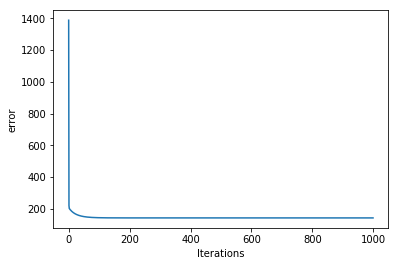

In [16]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("error")

Text(0,0.5,'Profit')

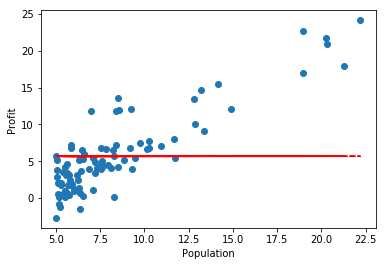

In [17]:
plt.scatter(X, y)


predicted_profit = trained_bias + trained_weights* X
plt.plot(X, predicted_profit, '--', color='red')
plt.xlabel('Population')
plt.ylabel('Profit')


In [18]:
predicted_profit = trained_bias + trained_weights* population

In [19]:
profit

0    17.5920
1     9.1302
Name: Profit, dtype: float64

In [20]:
population

0    6.1101
1    5.5277
Name: Population, dtype: float64

In [21]:
predicted_profit

0    5.680754
1    5.680750
Name: Population, dtype: float64

In [22]:
trained_weights

5.95538e-06

In [23]:
trained_bias

5.6807175